## Team Youza: Motivate bike data analysis

### import dependencies

In [1]:
from reader import load_dataframe
import pandas as pd
import numpy as np
import os
import glob
from datetime import date, datetime
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
import matplotlib.ticker as mtick
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.patches as mpatches
import folium
from folium.plugins import HeatMap
import plotly.plotly as py
import plotly.graph_objs as go


plot_colors=["#3498db","#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", '#ffce44']

### import data

In [2]:
df = pd.read_csv('ny_sf_all_data_0703.csv', parse_dates=[1,2])
df.sample(3)

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age
444752,San Francisco,747,2018-04-03 06:33:21.118,2018-04-03 06:37:33.4520,252,Market St at 40th St,37.830545,-122.273937,MacArthur BART Station,37.828410,-122.266315,Subscriber,1970.0,Female,48.0
607237,San Francisco,4018,2018-05-04 16:55:22.977,2018-05-04 17:16:38.0440,1275,Raymond Kimbell Playground,37.783813,-122.434559,Folsom St at 9th St,37.773717,-122.411647,Customer,1988.0,Male,30.0
608543,San Francisco,2625,2018-05-04 13:33:39.476,2018-05-04 13:51:02.1330,1042,The Embarcadero at Sansome St,37.804770,-122.403234,Washington St at Kearny St,37.795393,-122.404770,Customer,NaN,NaN,NaN


### clean data

In [3]:
df.fillna('Other')
df['start hour'] = df['starttime'].apply(lambda x: x.hour + (round((x.minute/60)*4))/4) #rounds to quarter hour

#convert andsplit date/time
df['starttime'] = pd.to_datetime(df['starttime'])
df.dtypes['starttime']
#will display month
df['month'] = df['starttime'].dt.month
#will display hour
df['hour'] = df['starttime'].dt.hour
#will display name of the day
df['day_of_week'] = df['starttime'].dt.weekday_name

#age grouping
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_groups = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age groups'] = pd.cut(df['age'], age_bins, labels=age_groups)


In [4]:
#group data by city
sf_df=df.loc[df['city']=='San Francisco']
ny_df=df.loc[df['city']=='New York']

### Parsing Data - Gender

In [5]:
#create df based on gender
nyfemale_df = ny_df.loc[ny_df["gender"] == "Female"]
nymale_df = ny_df.loc[ny_df["gender"] == "Male"]
sffemale_df = sf_df.loc[sf_df["gender"] == "Female"]
sfmale_df = sf_df.loc[sf_df["gender"] == "Male"]

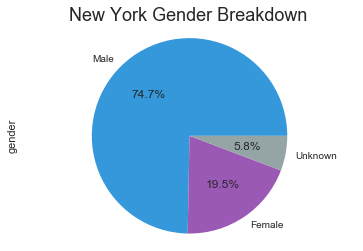

In [6]:
#NY Gender Charts 
sns.set()
ny_df.gender.value_counts().plot(kind='pie', autopct="%1.1f%%", colors = plot_colors)
plt.title('New York Gender Breakdown', fontsize=18)
plt.axis("equal")
plt.show()

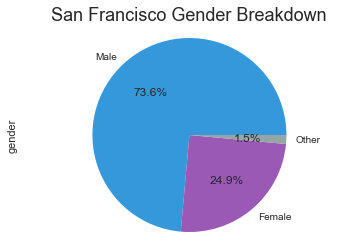

In [7]:
#SanFran Gender
sns.set()
sf_df.gender.value_counts().plot(kind='pie', autopct="%1.1f%%", colors = plot_colors)
plt.title('San Francisco Gender Breakdown', fontsize=18)
plt.axis("equal")
plt.show()

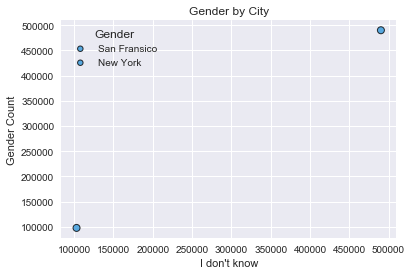

In [8]:
sns.set()
plt.scatter(sf_df['gender'].count(),
           sf_df['age'].count(),
           edgecolor="black", linewidths=1, color=plot_colors, marker="o",
           alpha=0.8, label="San Fransico")

plt.scatter(ny_df['gender'].count(),
           ny_df['age'].count(),
           edgecolor="black", linewidths=1, color=plot_colors, marker="o",
           alpha=0.8, label="New York")


plt.title("Gender by City")
plt.ylabel("Gender Count")
plt.xlabel("I don't know")
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="Gender",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.show()

### Parsing Data - Age

In [9]:
#Age group breakdown by Age and Gender
sf_age_gender = sf_df.groupby(['age groups', 'gender']).gender.count().unstack().fillna(0)
sf_age_gender =sf_age_gender.drop(['Other'], axis =1).reset_index()
sf_age_gender = sf_age_gender[['age groups', 'Male', 'Female']]
sf_age_gender

gender,age groups,Male,Female
0,0-20,4694,1595
1,21-30,115762,48292
2,31-40,136400,45198
3,41-50,63078,16066
4,51-60,31093,8818
5,61+,9509,2079


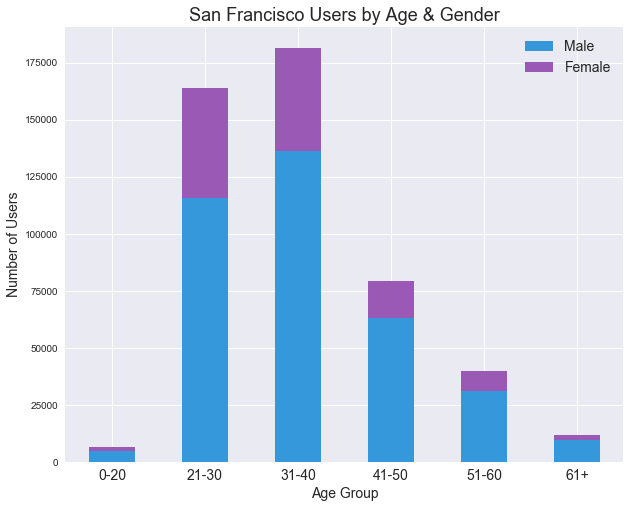

In [10]:
# age group break down by gender SF
sf_age_gender.plot(kind='bar', color =plot_colors, stacked=True, figsize=(10,8))
plt.legend(fontsize=14)
plt.title('San Francisco Users by Age & Gender', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 14, rotation =0)
plt.show()

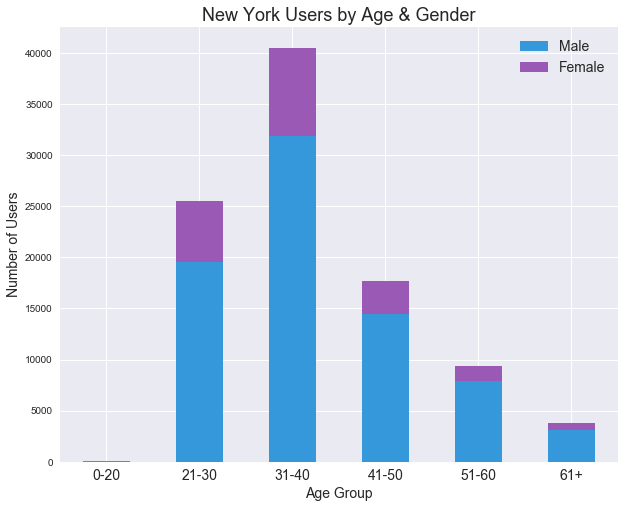

In [11]:
# age group break down by gender NY
ny_age_gender = ny_df.groupby(['age groups', 'gender']).gender.count().unstack().fillna(0)
ny_age_gender =ny_age_gender.drop(['Unknown'], axis =1).reset_index()
ny_age_gender = ny_age_gender[['age groups', 'Male', 'Female']]

ny_age_gender.plot(kind='bar', color =plot_colors, stacked=True, figsize=(10,8))
plt.legend(fontsize=14)
plt.title('New York Users by Age & Gender', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 14, rotation =0)
plt.show()

In [12]:
zero = sf_df[sf_df['age groups'] == '0-20']
twenty1= sf_df[sf_df['age groups'] == '31-40' ]
forty1 = sf_df[sf_df['age groups'] == '41-50' ]
fifty1 = sf_df[sf_df['age groups'] == '51-60' ]
sixty1 = sf_df[sf_df['age groups'] == '61+' ] 
thirty1 = sf_df[sf_df['age groups'] == '21-30' ]

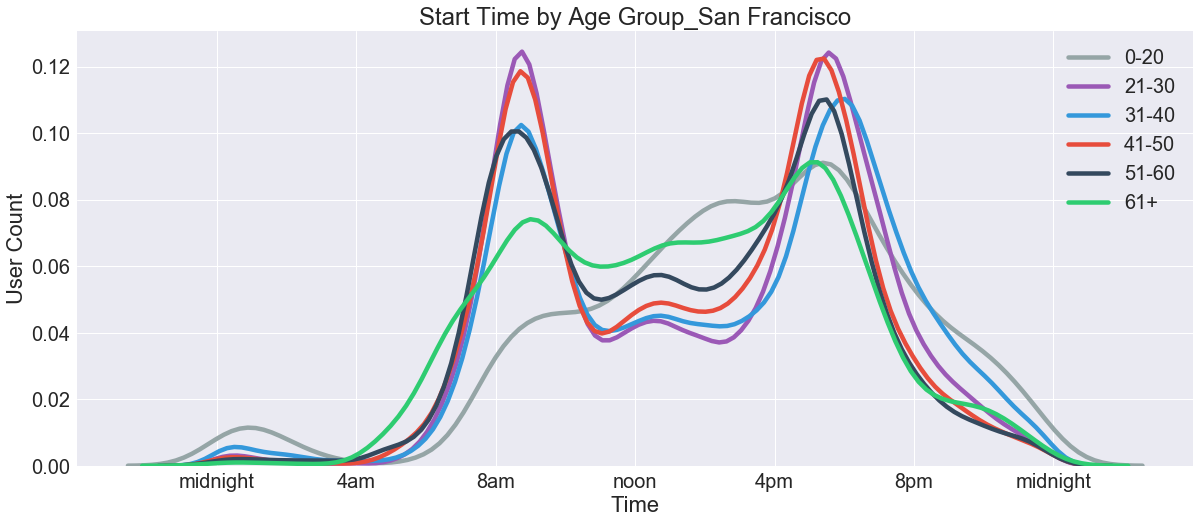

In [30]:
plt.figure(figsize=(20,8))
sns.set(rc={'lines.linewidth':4.5}, font_scale=2)
sns.distplot(zero['start hour'], hist=False, color ='#95a5a6', label = '0-20')
sns.distplot(twenty1['start hour'], hist=False, color ='#9b59b6', label = '21-30')
sns.distplot(thirty1['start hour'], hist=False, color = '#3498db', label = '31-40')
sns.distplot(forty1['start hour'], hist=False, color = '#e74c3c',label = '41-50')
sns.distplot(fifty1['start hour'], hist=False, color = '#34495e',label = '51-60')
sns.distplot(sixty1['start hour'], hist=False, color = '#2ecc71',label = '61+')
plt.legend()
plt.title("Start Time by Age Group_San Francisco")
plt.xlabel("Time")
plt.xticks(np.arange(0, 25, step=4), ('midnight', '4am', '8am', 'noon', '4pm', '8pm', 'midnight'))
plt.ylabel("User Count")
plt.show()

NameError: name 'plt1' is not defined

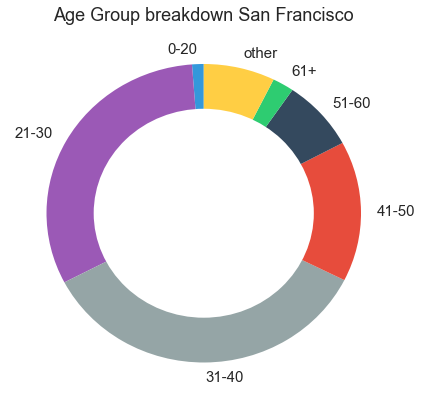

In [41]:
#SanFran
#SF age group break down
sf_age_group_df = pd.read_csv('sf_age_group_df.csv')
sf_age_group_df

sns.set(font_scale=1.5)
plt.figure(figsize=(6,6))
age_0 = float(sf_age_group_df.iloc[0]['usertype'])
age_21 = sf_age_group_df.iloc[1]['usertype']
age_31 = sf_age_group_df.iloc[2]['usertype']
age_41 = sf_age_group_df.iloc[3]['usertype']
age_51 = sf_age_group_df.iloc[4]['usertype']
age_61 = sf_age_group_df.iloc[5]['usertype']
age_other = sf_age_group_df.iloc[6]['usertype']

colors = plot_colors
labels = '0-20', '21-30','31-40','41-50','51-60', '61+', 'other'
ages = [age_0, age_21, age_31, age_41, age_51, age_61, age_other]

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.pie(ages, labels=labels, colors=plot_colors, startangle=90)
plt.title('Age Group breakdown San Francisco', fontsize=18)
plt.tight_layout()
plt1.axis('equal')
plt.show()

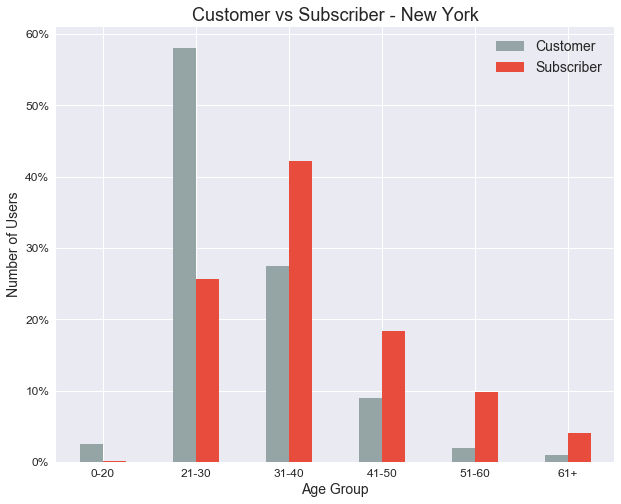

In [15]:
#custer type by age
#NewYork
ny_usertype = ny_df.groupby('usertype')['age groups'].value_counts(normalize=True)
ny_usertype
ny_usertype.unstack(0).plot(kind='bar', figsize=(10,8), color = ["#95a5a6", "#e74c3c"])
plt.legend(fontsize=14)
plt.title('Customer vs Subscriber - New York', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], fontsize=12) 
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 12, rotation=0)
plt.show()

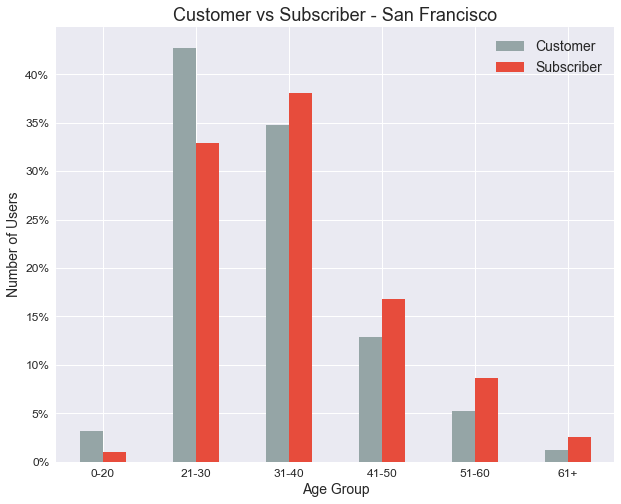

In [16]:
#custer type by age
#SanFran
sf_usertype = sf_df.groupby('usertype')['age groups'].value_counts(normalize=True)
sf_usertype
sf_usertype.unstack(0).plot(kind='bar', figsize=(10,8), color = ["#95a5a6", "#e74c3c"])
plt.legend(fontsize=14)
plt.title('Customer vs Subscriber - San Francisco', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], fontsize=12) 
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 12, rotation=0)
plt.show()

### Parsing Data - Trip Analysis

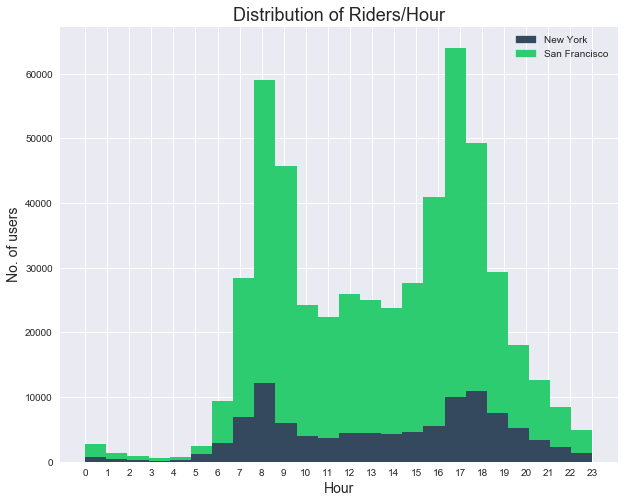

In [17]:
#graph size#graph s 
sns.set()
plt.figure(figsize=(10,8))

#graph type with no. of bins
plt.hist(sf_df['hour'], color="#2ecc71", bins = 24)
plt.hist(ny_df['hour'], color= '#34495e', bins = 24)

#lables
plt.xlabel('Hour', fontsize=14)
plt.ylabel('No. of users', fontsize=14)
plt.xticks(np.arange(0,24,1))

New_York =  mpatches.Patch(color='#34495e', label='New York')
Bay_Area = mpatches.Patch(color= "#2ecc71", label='San Francisco')

#title
plt.title('Distribution of Riders/Hour', fontsize=18)
plt.legend(handles =[New_York,Bay_Area])
#displaying of subscribers
plt.show()

In [25]:
#graph type with no. of bins
sf_riders=[93800,91640,90066,82198,80114,48338,42238]
ny_riders=[17530, 16649,16553,16164,14884,11785,9414]
sf_ny = list(zip(sf_riders, ny_riders))
riders=pd.DataFrame(sf_ny)
riders['day'] = ['Tuesday', 'Thursday', 'Wednesday', 'Monday', 'Friday', 'Saturday', 'Sunday']
riders.columns=['sf','ny', 'day']
riders

,sf,ny,day
0,93800,17530,Tuesday
1,91640,16649,Thursday
2,90066,16553,Wednesday
3,82198,16164,Monday
4,80114,14884,Friday
5,48338,11785,Saturday
6,42238,9414,Sunday


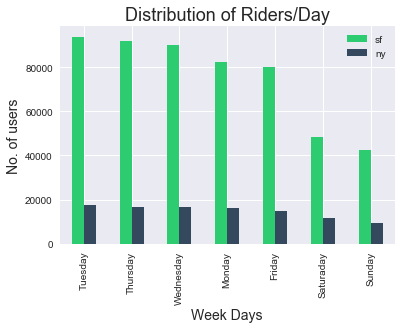

In [26]:
sns.set()
plt.figure(figsize=(10,8))

riders.plot(kind='bar', color=["#2ecc71", '#34495e'] )
#lables
plt.xlabel('Week Days', fontsize=14)
plt.ylabel('No. of users', fontsize=14)

#title
plt.title('Distribution of Riders/Day', fontsize=18)
plt.xticks(np.arange(0,7,1), ('Tuesday', 'Thursday', 'Wednesday', 'Monday', 'Friday','Saturaday', 'Sunday'))
#displaying of subscribers
plt.show()


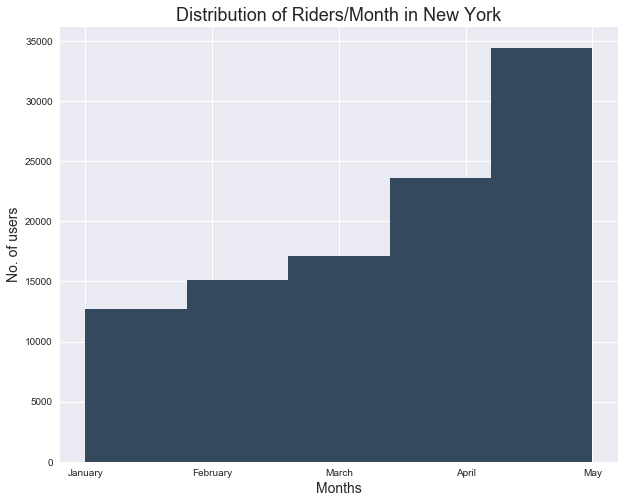

In [20]:
#usage by month New York
#graph size
sns.set()
plt.figure(figsize=(10,8))

#graph type with no. of bins
plt.hist(ny_df['month'], bins = 5, color='#34495e')

#lables
plt.xlabel('Months', fontsize=14)
plt.ylabel('No. of users', fontsize=14)
plt.xticks(np.arange(1,6,1), ('January', 'February', 'March', 'April', 'May'))


#title
plt.title('Distribution of Riders/Month in New York', fontsize=18)
#displaying of subscribers
plt.show()

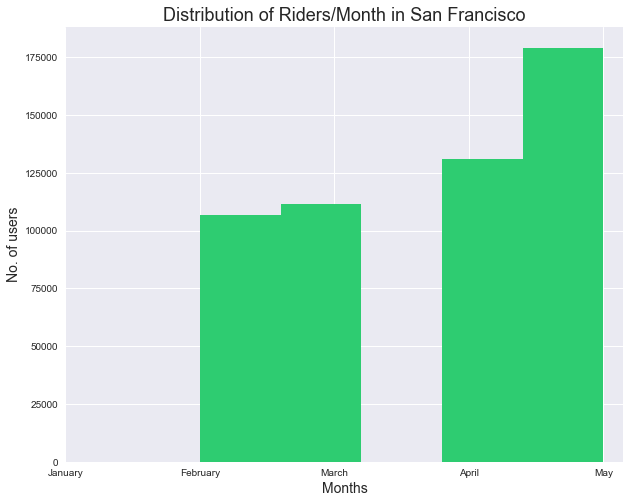

In [22]:
#usage by month SanFran
#graph size
sns.set()
plt.figure(figsize=(10,8))

#graph type with no. of bins
plt.hist(sf_df['month'], bins = 5, color="#2ecc71")

#lables
plt.xlabel('Months', fontsize=14)
plt.ylabel('No. of users', fontsize=14)
plt.xticks(np.arange(1,6,1), ('January', 'February', 'March', 'April', 'May'))


#title
plt.title('Distribution of Riders/Month in San Francisco', fontsize=18)
#displaying of subscribers
plt.show()

### Data Parsing - Location Analysis